# Bike Sharing Assignment
## Multiple Linear Regression

### Anirudhya Bhattacharya

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


The steps we will follow in the exercise are as follows:
1. Reading understanding and visualizing the data
2. Prepairing the data for modelling(train-test split, rescaling etc.)
3. Training the model
4. Residual analysis
5. Prediction and evaluation on test set

### 1. Reading and prepairing the data

In [209]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import calendar
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
sns.set(style='whitegrid')

In [210]:
## reading data
bike_data = pd.read_csv('C:/Users/ebyaaya/Upgrad/Bike Sharing Assignment/Bike Sharing Assignment Anirudhya Bhattacharya/day.csv')

In [211]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


Inspect the various aspects of the bike dataframe

In [212]:
bike_data.shape

(730, 16)

In [213]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [214]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


#### Since the difference between mean and median is not much , we can conclude that data has no outliers

* From the given data we can see that instant is an index column so we drop it
* We can see column dteday and yr month are having same data so we can drop dteday to avoid confusion
* From data dictionary we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered

In [215]:
bike_data.drop(['instant'],axis=1,inplace=True)
bike_data.drop(['dteday'],axis=1,inplace=True)
bike_data.drop(['casual','registered'],axis=1,inplace=True)

In [216]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


From data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables.
<br>We will replace season,mnth,weekday and weathersit with appropriate values from data dictionary.

In [217]:
bike_data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_data['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist & Cloudy",3:"Light Snow & Rain",4:'Heavy Snow & Rain'},inplace=True)
bike_data['weekday'] = bike_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.11,18.18,80.58,10.75,985
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.90,17.69,69.61,16.65,801
2,spring,0,Jan,0,Monday,1,Clear_Few Clouds,8.05,9.47,43.73,16.64,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,8.20,10.61,59.04,10.74,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,9.31,11.46,43.70,12.52,1600
5,spring,0,Jan,0,Thrusday,1,Clear_Few Clouds,8.38,11.66,51.83,6.00,1606
6,spring,0,Jan,0,Friday,1,Mist & Cloudy,8.06,10.44,49.87,11.30,1510
7,spring,0,Jan,0,Saturday,0,Mist & Cloudy,6.76,8.11,53.58,17.88,959
8,spring,0,Jan,0,Sunday,0,Clear_Few Clouds,5.67,5.81,43.42,24.25,822
9,spring,0,Jan,0,Monday,1,Clear_Few Clouds,6.18,7.54,48.29,14.96,1321


In [218]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


##  2. Visualising the Data

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

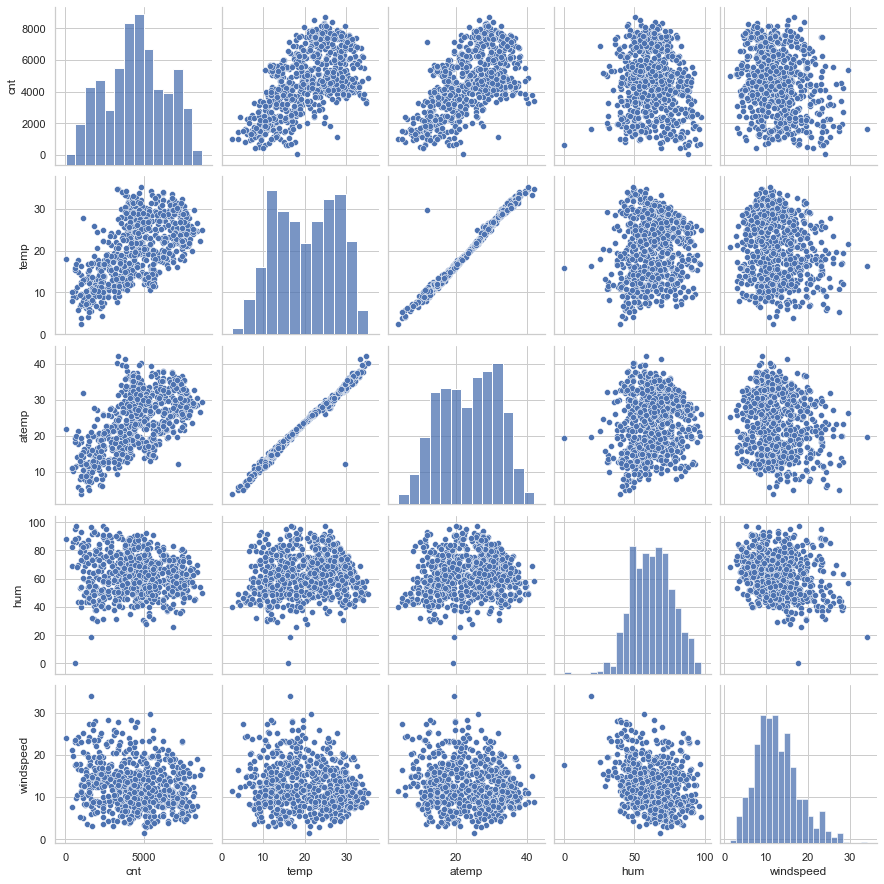

In [219]:
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

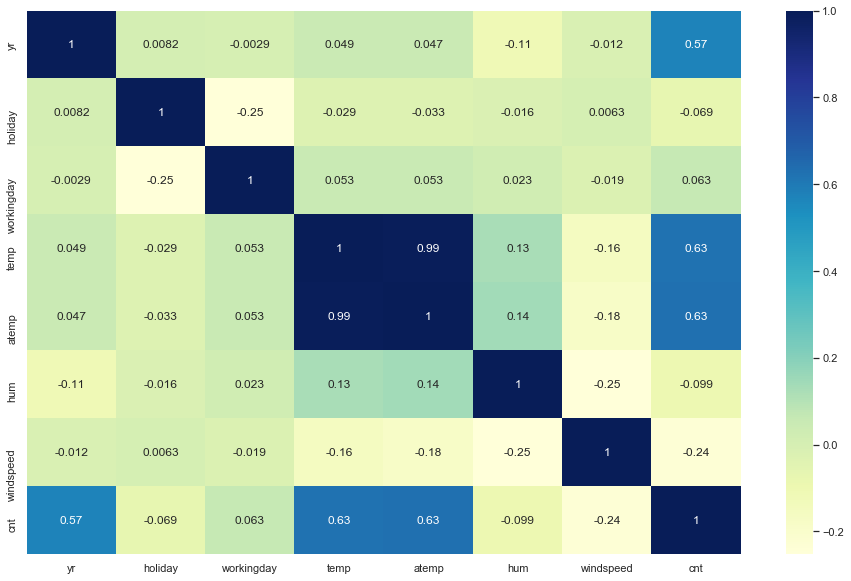

In [220]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Correlation between temp and atemp is 0.99 which is almost 1. Let us drop atemp and consider temp

In [221]:
bike_data.drop(['atemp'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.11,80.58,10.75,985
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.90,69.61,16.65,801
2,spring,0,Jan,0,Monday,1,Clear_Few Clouds,8.05,43.73,16.64,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,8.20,59.04,10.74,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,9.31,43.70,12.52,1600


#### Visualising categorical Variables to understand data better

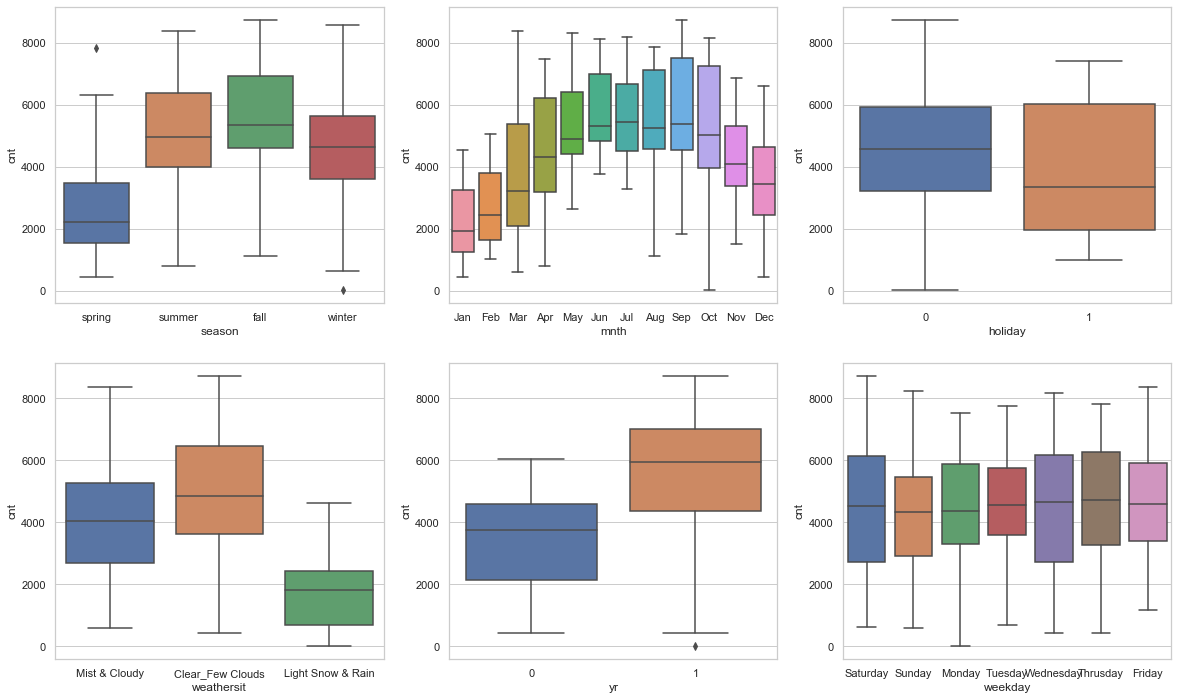

In [222]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()

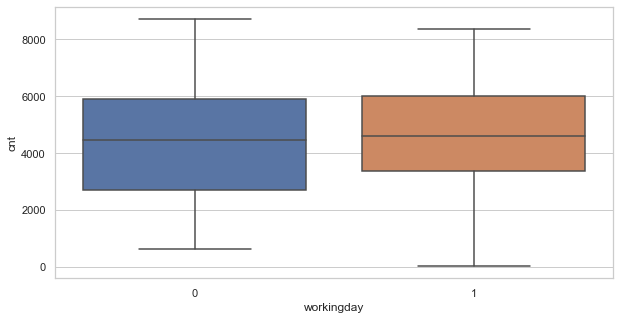

In [223]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

- The count of bike sharing is least for spring
- The number of bike shares incresed in 2019
- The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
- The cnt values increases in summer months
- The cnt values ars less during holidays

### 3. Creating Dummy Variables
- Creating dummy variables for season , mnth ,weathersit ,weekday
- Adding dummy variables to original dataset
- Dropping columns for which dummy variables were created

In [224]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_data[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )

## adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike_data],axis = 1)

## dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

bike_data.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.11,80.58,10.75,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.90,69.61,16.65,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.05,43.73,16.64,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.20,59.04,10.74,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.31,43.70,12.52,1600


In [225]:
bike_data.shape

(730, 29)

In [273]:
bike_data.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed', 'cnt'],
      dtype='object')

## 4. Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [226]:
train, test = train_test_split(bike_data, train_size = 0.7, random_state = 100)

In [227]:
train.shape

(510, 29)

In [228]:
test.shape

(220, 29)

## 5. Features Scaling

In [229]:
scaler = MinMaxScaler()

num_vars = ['cnt','hum','windspeed','temp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [230]:
train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.82,0.73,0.26,0.83
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.44,0.64,0.26,0.47
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.25,0.50,0.66,0.20
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.40,0.50,0.19,0.48
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.35,0.75,0.38,0.19


In [231]:
train.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,...,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.24,0.25,0.25,0.10,0.08,0.07,0.09,0.08,0.08,0.10,...,0.16,0.03,0.35,0.51,0.03,0.68,0.54,0.65,0.32,0.51
std,0.43,0.43,0.43,0.29,0.28,0.25,0.28,0.27,0.27,0.30,...,0.37,0.17,0.48,0.50,0.16,0.47,0.23,0.15,0.17,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.34,0.54,0.20,0.36
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.54,0.65,0.30,0.52
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,1.00,0.74,0.75,0.41,0.68
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


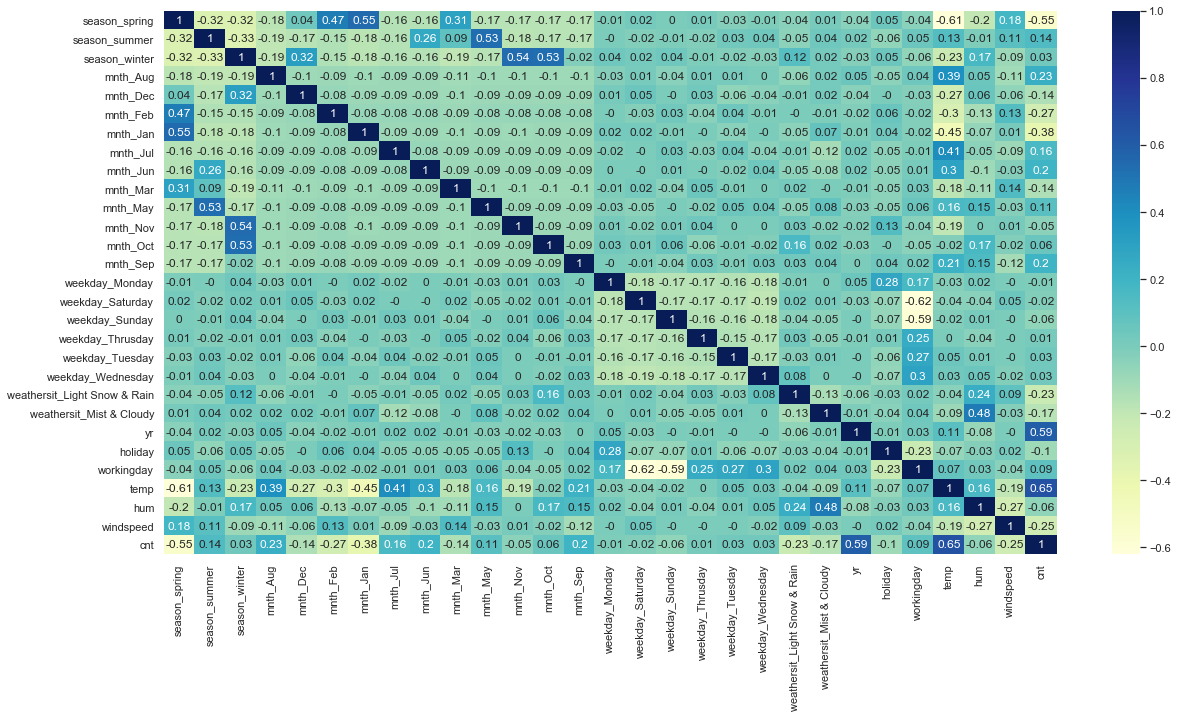

In [232]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(round(train.corr(), 2), annot = True, cmap="YlGnBu")
plt.show()

<b>cnt</b> has strong colinearity with <b>yr</b> and <b>temp</b>.

### Dividing into X and Y sets for the model building

In [233]:
y_train = train.pop('cnt')
X_train = train

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [234]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [235]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 6),
 ('weekday_Thrusday', False, 10),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [236]:
X_train.columns[rfe.support_]

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

<b>The above mentioned columns have been selected by RFE. So, we will start with these columns and use manual elimination approach
on them to have better model.</b>

<b>During our manual elimination process we have followed below steps iteratively:</b>
- Creating a dataframe with RFE selected variables
- Adding a constant variable
- Create a fitted model
- Check the parameters, summary and VIF(for for multicollinearity)
- Remove variable based on the p-Value(should be < 0.05) and VIF (should be <5)
- Reteat the process until we get a perfect model.

# Model 1

In [257]:
col = X_train.columns[rfe.support_]
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Check the parameters obtained
pd.options.display.float_format = '{:.6f}'.format
lm.params

const                           0.251893
season_spring                  -0.050897
season_summer                   0.050762
season_winter                   0.093301
mnth_Jan                       -0.034512
mnth_Jul                       -0.052918
mnth_Sep                        0.081395
weekday_Saturday                0.053552
weathersit_Light Snow & Rain   -0.247464
weathersit_Mist & Cloudy       -0.056318
yr                              0.230527
holiday                        -0.058173
workingday                      0.043335
temp                            0.509619
hum                            -0.156299
windspeed                      -0.186259
dtype: float64

In [258]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          4.22e-191
Time:                        03:30:05   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [260]:
# checking the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.600000
1,season_spring,5.080000
13,temp,3.890000
3,season_winter,3.590000
2,season_summer,2.650000
14,hum,1.910000
12,workingday,1.880000
7,weekday_Saturday,1.780000
4,mnth_Jan,1.570000
9,weathersit_Mist & Cloudy,1.570000


#### We generally want a VIF that is less than 5.
#### Also the p-value for the variable "mnth_Jan" is almost 0.05.
#### So there are clearly some variables we need to drop. Lets drop the variable and rebulid the model.

In [261]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [262]:
# checking the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.370000
12,temp,17.780000
11,workingday,5.310000
14,windspeed,4.730000
0,season_spring,4.530000
2,season_winter,3.460000
1,season_summer,2.850000
8,weathersit_Mist & Cloudy,2.290000
9,yr,2.090000
6,weekday_Saturday,1.980000


# Model 2

In [263]:
### dropping mnth_Jan from the model
X_train_new = X_train_new.drop(['mnth_Jan'], axis=1)

In [264]:
# Adding a constant variable
X_train_new = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit()

# Check the parameters obtained
pd.options.display.float_format = '{:.6f}'.format
lm.params

const                           0.240163
season_spring                  -0.055546
season_summer                   0.053733
season_winter                   0.099214
mnth_Jul                       -0.054616
mnth_Sep                        0.081983
weekday_Saturday                0.053031
weathersit_Light Snow & Rain   -0.245009
weathersit_Mist & Cloudy       -0.056344
yr                              0.229763
holiday                        -0.059083
workingday                      0.043033
temp                            0.527708
hum                            -0.161086
windspeed                      -0.180875
dtype: float64

In [266]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          2.11e-191
Time:                        03:32:20   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [267]:
# checking the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.350000
1,season_spring,5.020000
12,temp,3.620000
3,season_winter,3.490000
2,season_summer,2.620000
13,hum,1.910000
11,workingday,1.880000
6,weekday_Saturday,1.780000
8,weathersit_Mist & Cloudy,1.570000
4,mnth_Jul,1.490000


In [268]:
### dropping const from the model
X_train_new = X_train_new.drop(["const"], axis = 1)

# checking the VIFs for the model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,28.460000
11,temp,16.980000
10,workingday,5.280000
13,windspeed,4.720000
0,season_spring,4.240000
2,season_winter,3.420000
1,season_summer,2.850000
7,weathersit_Mist & Cloudy,2.290000
8,yr,2.080000
5,weekday_Saturday,1.970000


# Model 3

In [269]:
### dropping hum from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          1.28e-188
Time:                        03:42:50   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [270]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.970000
10,workingday,5.200000
12,windspeed,4.650000
0,season_spring,2.490000
1,season_summer,2.340000
8,yr,2.070000
2,season_winter,1.980000
5,weekday_Saturday,1.960000
3,mnth_Jul,1.580000
7,weathersit_Mist & Cloudy,1.570000


# Model 4

In [283]:
### dropping workingday from the model
X_train_new = X_train_new.drop(['workingday'], axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          1.68e-186
Time:                        04:33:59   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

###### weekday_Saturday has a high p value so we will remove it and re-build the model again

In [284]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.120000
11,windspeed,4.620000
1,season_summer,2.230000
0,season_spring,2.100000
8,yr,2.070000
2,season_winter,1.790000
3,mnth_Jul,1.580000
7,weathersit_Mist & Cloudy,1.550000
4,mnth_Sep,1.340000
5,weekday_Saturday,1.190000


# Model 5

In [285]:
### dropping weekday_Saturday from the model
X_train_new = X_train_new.drop(['weekday_Saturday'], axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          5.06e-187
Time:                        04:37:02   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [287]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.090000
10,windspeed,4.600000
1,season_summer,2.230000
0,season_spring,2.080000
7,yr,2.070000
2,season_winter,1.780000
3,mnth_Jul,1.580000
6,weathersit_Mist & Cloudy,1.550000
4,mnth_Sep,1.340000
5,weathersit_Light Snow & Rain,1.080000


This looks like an acceptable model. We will keep the <b>temp</b> variable even if its VIF is greater than 5, because during our EDA, we have seen that Temperature has a high correlation with the <b>cnt</b> variable[0.65 to be exact]. Thus as per business understanding, we finalize this model as the final model.

## Step 7: Residual Analysis of the train data and Validating the assumptions of Linear Regression

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [288]:
y_train_cnt = lm.predict(X_train_lm)

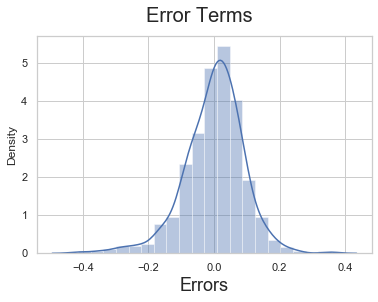

In [289]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

We can clearly see that the residuals are following normal distribution

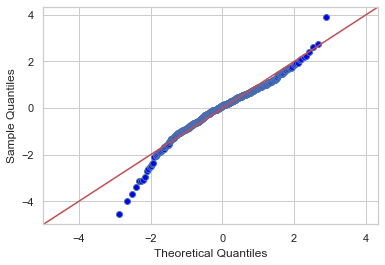

In [312]:
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

### Validating the assumptions of Linear Regression
- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals (absence of auto-correlation)
- Normality of Errors

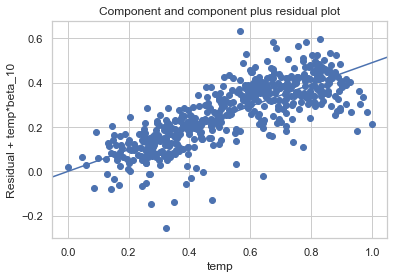

In [298]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

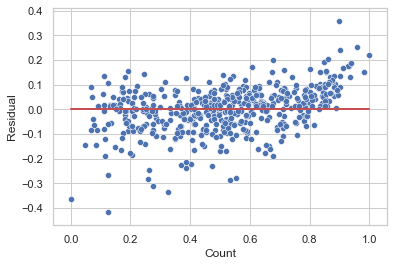

In [292]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
y_train_pred = lm.predict(X_train_lm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

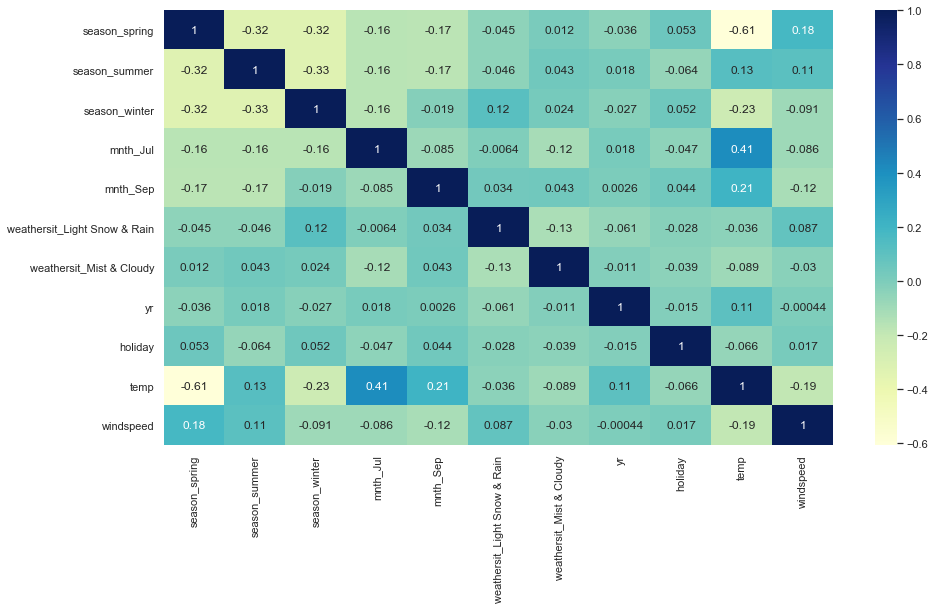

In [293]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

All variables have less than 0.50 correlation with eachother. Checking the VIF now.

In [294]:
print(vif)

                        Features      VIF
9                           temp 5.090000
10                     windspeed 4.600000
1                  season_summer 2.230000
0                  season_spring 2.080000
7                             yr 2.070000
2                  season_winter 1.780000
3                       mnth_Jul 1.580000
6       weathersit_Mist & Cloudy 1.550000
4                       mnth_Sep 1.340000
5   weathersit_Light Snow & Rain 1.080000
8                        holiday 1.040000


Independence of residuals (absence of auto-correlation)
<br>Autocorrelation refers to the fact that observations’ errors are correlated
<br>To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
<br>The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables (0–2: positive auto-correlation, 2–4: negative auto-correlation)

In [313]:
print('The Durbin-Watson value for Model No.5 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model No.5 is 2.0509


There is almost nill auto-correlation

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

#### Applying the scaling on the test sets

In [299]:
num_vars = ['cnt','hum','windspeed','temp']
test[num_vars] = scaler.transform(test[num_vars])

In [300]:
test.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.100000,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.300684,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [301]:
y_test = test.pop('cnt')
X_test = test

In [ ]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [302]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         220 non-null    float64
 1   season_spring                 220 non-null    uint8  
 2   season_summer                 220 non-null    uint8  
 3   season_winter                 220 non-null    uint8  
 4   mnth_Jul                      220 non-null    uint8  
 5   mnth_Sep                      220 non-null    uint8  
 6   weathersit_Light Snow & Rain  220 non-null    uint8  
 7   weathersit_Mist & Cloudy      220 non-null    uint8  
 8   yr                            220 non-null    int64  
 9   holiday                       220 non-null    int64  
 10  temp                          220 non-null    float64
 11  windspeed                     220 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [303]:
# Making predictions
y_pred = lm.predict(X_test)

In [304]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8052680349048551

In [305]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.0093109686080971

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

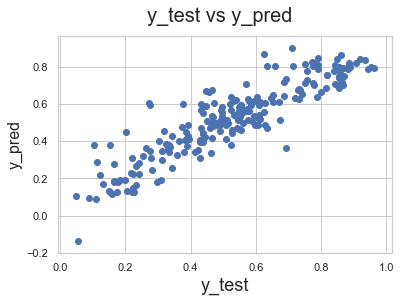

In [306]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [308]:
from sklearn.metrics import mean_absolute_error
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_pred))

The R-Squared score of the model for the predicted values is 0.81
The Root Mean Squared Error of the model for the predicted values is 0.0965
The Mean Absolute Error of the model for the predicted values is 0.07240462561497796


In [310]:
# As asked in problem statement
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8052680349048551

In [311]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.490988
8,yr,0.233570
0,const,0.199434
3,season_winter,0.081741
5,mnth_Sep,0.076846
2,season_summer,0.046487
4,mnth_Jul,-0.052057
1,season_spring,-0.067169
7,weathersit_Mist & Cloudy,-0.080167


We can see that the equation of our best fitted line is:

<b>cnt = 0.199434  + 0.490988 X temp + 0.233570 X yr + 0.081741 X season_Winter + 0.076846 X mnth_Sep + 0.046487 X season_summer   - 0.052057 X mnth_Jul - 0.067169 X season_ Spring - 0.080167 X weathersit_Mist & Cloudy - 0.097463 X holiday - 0.147919 X windspeed - 0.284199 X weathersit_Light Snow & Rain<b/>

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by temperature,season and month.